In [87]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### 데이터 전처리 단계  
##### 1. 데이터 불러오기  
##### 2. 데이터 타입 확인  
##### 3. 결손치 확인 및 처리  
##### 4. 통계적 기법을 통한 이상치 확인  
##### 5. 이상치 처리  
##### 6. 정규화  
##### 7. 데이터셋 통합  
##### 8. 상관관계 분석

##### 데이터 불러오기

In [88]:
import os
os.listdir("C:/Users/gun67/전력 프로젝트/2013")

['a. 2013_1_House1_Ch1_Combined_Data_New.csv',
 'b. 2013_2_House1_Ch1_Combined_Data_New.csv',
 'c. 2013_3_House1_Ch1_Combined_Data_New.csv',
 'd. 2013_4_House1_Ch1_Combined_Data_New.csv',
 'e. 2013_5_House1_Ch1_Combined_Data_New.csv',
 'f. 2013_6_House1_Ch1_Combined_Data_New.csv',
 'g. 2013_7_House1_Ch1_Combined_Data_New.csv',
 'h. 2013_8_House1_Ch1_Combined_Data_New.csv',
 'i. 2013_9_House1_Ch1_Combined_Data_New.csv',
 'j. 2013_10_House1_Ch1_Combined_Data_New.csv',
 'k. 2013_11_House1_Ch1_Combined_Data_New.csv',
 'l. 2013_12_House1_Ch1_Combined_Data_New.csv']

In [89]:
cd C:/Users/gun67/전력 프로젝트/2013

C:\Users\gun67\전력 프로젝트\2013


In [90]:
forders = os.listdir("C:/Users/gun67/전력 프로젝트/2013")
df_all_data = pd.DataFrame()

for files in forders :
    df = pd.read_csv(files, dtype = {'Code':str}, parse_dates = ["Watt"])
    df_all_data = pd.concat([df_all_data, df], axis = 0)

C:\Users\gun67\AppData\Local\Temp\ipykernel_15276\1368539699.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(files, dtype = {'Code':str}, parse_dates = ["Watt"])
C:\Users\gun67\AppData\Local\Temp\ipykernel_15276\1368539699.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(files, dtype = {'Code':str}, parse_dates = ["Watt"])
C:\Users\gun67\AppData\Local\Temp\ipykernel_15276\1368539699.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(files, dtype = {'Code':str}, parse_dates = ["Watt"])
C:\Users\gun67\AppData\Local\Te

In [91]:
df_all_data

,Unnamed: 0,Year-Month-Date,Time,Holiday,Watt,Temp('C),Humidity(%),CPI
0,0,2013-01-01,[ 00:00 ],1,522,10.0,87.000,2.7
1,1,2013-01-01,[ 00:01 ],1,558,10.0,86.833,2.7
2,2,2013-01-01,[ 00:02 ],1,537,10.0,86.667,2.7
3,3,2013-01-01,[ 00:03 ],1,525,10.0,86.500,2.7
4,4,2013-01-01,[ 00:04 ],1,539,10.0,86.333,2.7
...,...,...,...,...,...,...,...,...
44635,44635,2013-12-31,[ 23:55 ],0,401,8.0,81.000,2.0
44636,44636,2013-12-31,[ 23:56 ],0,400,8.0,81.000,2.0
44637,44637,2013-12-31,[ 23:57 ],0,400,8.0,81.000,2.0
44638,44638,2013-12-31,[ 23:58 ],0,497,8.0,81.000,2.0


In [92]:
df_all_data.drop(columns = ["Unnamed: 0"], inplace = True)
df_all_data

,Year-Month-Date,Time,Holiday,Watt,Temp('C),Humidity(%),CPI
0,2013-01-01,[ 00:00 ],1,522,10.0,87.000,2.7
1,2013-01-01,[ 00:01 ],1,558,10.0,86.833,2.7
2,2013-01-01,[ 00:02 ],1,537,10.0,86.667,2.7
3,2013-01-01,[ 00:03 ],1,525,10.0,86.500,2.7
4,2013-01-01,[ 00:04 ],1,539,10.0,86.333,2.7
...,...,...,...,...,...,...,...
44635,2013-12-31,[ 23:55 ],0,401,8.0,81.000,2.0
44636,2013-12-31,[ 23:56 ],0,400,8.0,81.000,2.0
44637,2013-12-31,[ 23:57 ],0,400,8.0,81.000,2.0
44638,2013-12-31,[ 23:58 ],0,497,8.0,81.000,2.0


In [93]:
df_all_data.reset_index(drop = True, inplace = True)
df_all_data

,Year-Month-Date,Time,Holiday,Watt,Temp('C),Humidity(%),CPI
0,2013-01-01,[ 00:00 ],1,522,10.0,87.000,2.7
1,2013-01-01,[ 00:01 ],1,558,10.0,86.833,2.7
2,2013-01-01,[ 00:02 ],1,537,10.0,86.667,2.7
3,2013-01-01,[ 00:03 ],1,525,10.0,86.500,2.7
4,2013-01-01,[ 00:04 ],1,539,10.0,86.333,2.7
...,...,...,...,...,...,...,...
525595,2013-12-31,[ 23:55 ],0,401,8.0,81.000,2.0
525596,2013-12-31,[ 23:56 ],0,400,8.0,81.000,2.0
525597,2013-12-31,[ 23:57 ],0,400,8.0,81.000,2.0
525598,2013-12-31,[ 23:58 ],0,497,8.0,81.000,2.0


##### 데이터 타입 확인

In [94]:
print(df_all_data.dtypes)

Year-Month-Date     object
Time                object
Holiday              int64
Watt                object
Temp('C)           float64
Humidity(%)        float64
CPI                float64
dtype: object


In [95]:
df_all_data["Watt"] = pd.to_numeric(df_all_data["Watt"], errors = 'coerce')

In [96]:
df_all_data

,Year-Month-Date,Time,Holiday,Watt,Temp('C),Humidity(%),CPI
0,2013-01-01,[ 00:00 ],1,522,10.0,87.000,2.7
1,2013-01-01,[ 00:01 ],1,558,10.0,86.833,2.7
2,2013-01-01,[ 00:02 ],1,537,10.0,86.667,2.7
3,2013-01-01,[ 00:03 ],1,525,10.0,86.500,2.7
4,2013-01-01,[ 00:04 ],1,539,10.0,86.333,2.7
...,...,...,...,...,...,...,...
525595,2013-12-31,[ 23:55 ],0,401,8.0,81.000,2.0
525596,2013-12-31,[ 23:56 ],0,400,8.0,81.000,2.0
525597,2013-12-31,[ 23:57 ],0,400,8.0,81.000,2.0
525598,2013-12-31,[ 23:58 ],0,497,8.0,81.000,2.0


##### 결손치 확인

In [97]:
print(df_all_data[df_all_data['Watt'] == 0])
print(df_all_data[df_all_data["Temp('C)"] == "NaN"])
print(df_all_data[(df_all_data["Humidity(%)"] < 0) | (df_all_data["Humidity(%)"] > 100)])

       Year-Month-Date       Time  Holiday  Watt  Temp('C)  Humidity(%)  CPI
1044        2013-01-01  [ 17:24 ]        1     0     6.000       71.200  2.7
4744        2013-01-04  [ 07:04 ]        0     0     9.867       76.800  2.7
5080        2013-01-04  [ 12:40 ]        0     0    10.000       76.000  2.7
6644        2013-01-05  [ 14:44 ]        1     0    10.000       84.667  2.7
6645        2013-01-05  [ 14:45 ]        1     0    10.000       84.500  2.7
...                ...        ...      ...   ...       ...          ...  ...
196354      2013-05-17  [ 08:34 ]        0     0     9.133       80.533  2.7
221463      2013-06-03  [ 19:03 ]        0     0    13.000       63.000  2.9
221464      2013-06-03  [ 19:04 ]        0     0    13.000       63.000  2.9
221465      2013-06-03  [ 19:05 ]        0     0    13.000       63.000  2.9
221466      2013-06-03  [ 19:06 ]        0     0    13.000       63.000  2.9

[34449 rows x 7 columns]
Empty DataFrame
Columns: [Year-Month-Date, Time, H

In [98]:
df_all_data["Watt"]

0         522
1         558
2         537
3         525
4         539
         ... 
525595    401
525596    400
525597    400
525598    497
525599    493
Name: Watt, Length: 525600, dtype: int64

##### 결손치 처리

In [99]:
# 전력값 결손치를 평균값으로 대체
data_watt = pd.DataFrame(df_all_data["Watt"])
print("결손치 대체 전 데이터")
print(data_watt)

# 0이 아닌 값을 가지는 데이터의 평균 계산
Watt_mean = data_watt[data_watt["Watt"] != 0]["Watt"].mean()

# 결손치를 평균값으로 대체
data_watt.loc[data_watt["Watt"] == 0, "Watt"] = Watt_mean

print("\n결손치 대체 후 데이터")
print(data_watt)

결손치 대체 전 데이터
        Watt
0        522
1        558
2        537
3        525
4        539
...      ...
525595   401
525596   400
525597   400
525598   497
525599   493

[525600 rows x 1 columns]

결손치 대체 후 데이터
         Watt
0       522.0
1       558.0
2       537.0
3       525.0
4       539.0
...       ...
525595  401.0
525596  400.0
525597  400.0
525598  497.0
525599  493.0

[525600 rows x 1 columns]


C:\Users\gun67\AppData\Local\Temp\ipykernel_15276\1947294027.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '411.36976204873855' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_watt.loc[data_watt["Watt"] == 0, "Watt"] = Watt_mean


##### 통계적 기법을 사용한 이상치 확인

In [100]:
# Watt
# 통계적 방법으로 이상치 확인
# Z-점수 ; 각 데이터 포인트가 평균에서 몇 표준편차 떨어져 있는지 나타냄, 일반적으로 Z-점수가 3 이상이거나 -3 이하인 경우 이상치로 간주
# 사분위 범위 ; Q1(1사분위수)와 Q3(3사분위수) 사이의 범위를 계산하고, Q1 - 1.5 * IQR 보다 작거나 Q3 + 1.5 * IQR 보다 큰 값을 이상치로 간주

# Z-점수 계산
z_scores = np.abs(stats.zscore(df_all_data["Watt"]))
print("Z-scores : ", z_scores)

# IQR 계산
Q1 = df_all_data["Watt"].quantile(0.25)
Q3 = df_all_data["Watt"].quantile(0.75)
IQR = Q3 - Q1
print("IQR : ", IQR)

# 이상치 확인
outliers = df_all_data[(df_all_data["Watt"] < (Q1 - 1.5 * IQR)) | (df_all_data["Watt"] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR : ", outliers)

# z_scores 가 3 미만인 데이터 찾기
cleaned_data_watt = df_all_data[(z_scores < 3)]
print("Data after removing outliers based on Z-score : ", cleaned_data_watt)

Z-scores :  0         0.266131
1         0.335763
2         0.295144
3         0.271934
4         0.299013
            ...   
525595    0.032093
525596    0.030159
525597    0.030159
525598    0.217776
525599    0.210040
Name: Watt, Length: 525600, dtype: float64
IQR :  208.0
Outliers based on IQR :         Year-Month-Date       Time  Holiday  Watt  Temp('C)  Humidity(%)  CPI
27          2013-01-01  [ 00:27 ]        1  1136    10.000       82.500  2.7
28          2013-01-01  [ 00:28 ]        1  1136    10.000       82.333  2.7
55          2013-01-01  [ 00:55 ]        1  2483     9.167       86.167  2.7
56          2013-01-01  [ 00:56 ]        1  2492     9.133       86.333  2.7
57          2013-01-01  [ 00:57 ]        1  2488     9.100       86.500  2.7
...                ...        ...      ...   ...       ...          ...  ...
525385      2013-12-31  [ 20:25 ]        0   732     7.000       76.000  2.0
525386      2013-12-31  [ 20:26 ]        0   730     7.000       76.000  2.0
52538

In [101]:
# Temp
# Z-점수 계산
z_scores = np.abs(stats.zscore(df_all_data["Temp('C)"]))
print("Z-scores : ", z_scores)

# IQR 계산
Q1 = df_all_data["Temp('C)"].quantile(0.25)
Q3 = df_all_data["Temp('C)"].quantile(0.75)
IQR = Q3 - Q1
print("IQR : ", IQR)

# 이상치 확인
outliers = df_all_data[(df_all_data["Temp('C)"] < (Q1 - 1.5 * IQR)) | (df_all_data["Temp('C)"] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR : ", outliers)

# z_scores 가 3 미만인 데이터 찾기
cleaned_df_Temp = df_all_data[(z_scores < 3)]
print("Data after removing outliers based on Z-score : ", cleaned_df_Temp)

Z-scores :  0         0.177163
1         0.177163
2         0.177163
3         0.177163
4         0.177163
            ...   
525595    0.481655
525596    0.481655
525597    0.481655
525598    0.481655
525599    0.481655
Name: Temp('C), Length: 525600, dtype: float64
IQR :  10.0
Outliers based on IQR :         Year-Month-Date       Time  Holiday  Watt  Temp('C)  Humidity(%)  CPI
291736      2013-07-22  [ 14:16 ]        0   196    31.067         38.6  2.8
291737      2013-07-22  [ 14:17 ]        0   199    31.133         38.2  2.8
291738      2013-07-22  [ 14:18 ]        0   199    31.200         37.8  2.8
291739      2013-07-22  [ 14:19 ]        0   143    31.267         37.4  2.8
291740      2013-07-22  [ 14:20 ]        0   143    31.333         37.0  2.8
...                ...        ...      ...   ...       ...          ...  ...
306354      2013-08-01  [ 17:54 ]        0   288    31.200         42.4  2.7
306355      2013-08-01  [ 17:55 ]        0   288    31.167         42.5  2.7
30

In [102]:
# humidity

# Z-점수 계산
z_scores = np.abs(stats.zscore(df_all_data["Humidity(%)"]))
print("Z-scores : ", z_scores)

# IQR 계산
Q1 = df_all_data["Humidity(%)"].quantile(0.25)
Q3 = df_all_data["Humidity(%)"].quantile(0.75)
IQR = Q3 - Q1
print("IQR : ", IQR)

# 이상치 확인
outliers = df_all_data[(df_all_data["Humidity(%)"] < (Q1 - 1.5 * IQR)) | (df_all_data["Humidity(%)"] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR : ", outliers)

# z_scores 가 3 미만인 데이터 찾기
cleaned_df_humidity = df_all_data[(z_scores < 3)]
print("Data after removing outliers based on Z-score : ", cleaned_df_humidity)

Z-scores :  0         0.873060
1         0.861652
2         0.850313
3         0.838906
4         0.827498
            ...   
525595    0.463212
525596    0.463212
525597    0.463212
525598    0.463212
525599    0.463212
Name: Humidity(%), Length: 525600, dtype: float64
IQR :  21.599999999999994
Outliers based on IQR :         Year-Month-Date       Time  Holiday  Watt  Temp('C)  Humidity(%)  CPI
138986      2013-04-07  [ 12:26 ]        1   266     9.000       32.667  2.4
138987      2013-04-07  [ 12:27 ]        1   252     9.000       32.500  2.4
138988      2013-04-07  [ 12:28 ]        1   251     9.000       32.333  2.4
138989      2013-04-07  [ 12:29 ]        1   237     9.000       32.000  2.4
138990      2013-04-07  [ 12:30 ]        1   235     9.000       32.000  2.4
...                ...        ...      ...   ...       ...          ...  ...
291969      2013-07-22  [ 18:09 ]        0   262    30.700       32.200  2.8
291970      2013-07-22  [ 18:10 ]        0   264    30.667    

##### 이상치 처리

In [103]:
# Watt

# 이상치 대체 ; 평균, 중앙값 등으로 대체

# 이상치를 중앙값으로 대체
median_value = df_all_data["Watt"].median()
df_all_data.loc[(z_scores >= 3), "Watt"] = median_value
print("Data after replacing outliers with median value : ", df_all_data)

Data after replacing outliers with median value :         Year-Month-Date       Time  Holiday  Watt  Temp('C)  Humidity(%)  CPI
0           2013-01-01  [ 00:00 ]        1   522      10.0       87.000  2.7
1           2013-01-01  [ 00:01 ]        1   558      10.0       86.833  2.7
2           2013-01-01  [ 00:02 ]        1   537      10.0       86.667  2.7
3           2013-01-01  [ 00:03 ]        1   525      10.0       86.500  2.7
4           2013-01-01  [ 00:04 ]        1   539      10.0       86.333  2.7
...                ...        ...      ...   ...       ...          ...  ...
525595      2013-12-31  [ 23:55 ]        0   401       8.0       81.000  2.0
525596      2013-12-31  [ 23:56 ]        0   400       8.0       81.000  2.0
525597      2013-12-31  [ 23:57 ]        0   400       8.0       81.000  2.0
525598      2013-12-31  [ 23:58 ]        0   497       8.0       81.000  2.0
525599      2013-12-31  [ 23:59 ]        0   493       8.0       81.000  2.0

[525600 rows x 7 columns

In [104]:
# Temp

# 이상치를 중앙값으로 대체
median_value = df_all_data["Temp('C)"].median()
df_all_data.loc[(z_scores >= 3), "Temp('C)"] = median_value
print("Data after replacing outliers with median value : ", df_all_data)

Data after replacing outliers with median value :         Year-Month-Date       Time  Holiday  Watt  Temp('C)  Humidity(%)  CPI
0           2013-01-01  [ 00:00 ]        1   522      10.0       87.000  2.7
1           2013-01-01  [ 00:01 ]        1   558      10.0       86.833  2.7
2           2013-01-01  [ 00:02 ]        1   537      10.0       86.667  2.7
3           2013-01-01  [ 00:03 ]        1   525      10.0       86.500  2.7
4           2013-01-01  [ 00:04 ]        1   539      10.0       86.333  2.7
...                ...        ...      ...   ...       ...          ...  ...
525595      2013-12-31  [ 23:55 ]        0   401       8.0       81.000  2.0
525596      2013-12-31  [ 23:56 ]        0   400       8.0       81.000  2.0
525597      2013-12-31  [ 23:57 ]        0   400       8.0       81.000  2.0
525598      2013-12-31  [ 23:58 ]        0   497       8.0       81.000  2.0
525599      2013-12-31  [ 23:59 ]        0   493       8.0       81.000  2.0

[525600 rows x 7 columns

In [105]:
# Humidity

# 이상치를 중앙값으로 대체
median_value = df_all_data["Humidity(%)"].median()
df_all_data.loc[(z_scores >= 3), "Humidity(%)"] = median_value
print("Data after replacing outliers with median value : ", df_all_data)

Data after replacing outliers with median value :         Year-Month-Date       Time  Holiday  Watt  Temp('C)  Humidity(%)  CPI
0           2013-01-01  [ 00:00 ]        1   522      10.0       87.000  2.7
1           2013-01-01  [ 00:01 ]        1   558      10.0       86.833  2.7
2           2013-01-01  [ 00:02 ]        1   537      10.0       86.667  2.7
3           2013-01-01  [ 00:03 ]        1   525      10.0       86.500  2.7
4           2013-01-01  [ 00:04 ]        1   539      10.0       86.333  2.7
...                ...        ...      ...   ...       ...          ...  ...
525595      2013-12-31  [ 23:55 ]        0   401       8.0       81.000  2.0
525596      2013-12-31  [ 23:56 ]        0   400       8.0       81.000  2.0
525597      2013-12-31  [ 23:57 ]        0   400       8.0       81.000  2.0
525598      2013-12-31  [ 23:58 ]        0   497       8.0       81.000  2.0
525599      2013-12-31  [ 23:59 ]        0   493       8.0       81.000  2.0

[525600 rows x 7 columns

##### 정규화

In [106]:
# Watt

# 정규화
scaler = MinMaxScaler()
scaled_watt = scaler.fit_transform(pd.DataFrame(df_all_data["Watt"]))
scaled_temp = scaler.fit_transform(pd.DataFrame(df_all_data["Temp('C)"]))
scaled_humidity = scaler.fit_transform(pd.DataFrame(df_all_data["Humidity(%)"]))

print(scaled_watt)
print(scaled_temp)
print(scaled_humidity)

[[0.06481252]
 [0.06928234]
 [0.06667494]
 ...
 [0.04966476]
 [0.06170847]
 [0.06121182]]
[[0.37837838]
 [0.37837838]
 [0.37837838]
 ...
 [0.32432432]
 [0.32432432]
 [0.32432432]]
[[0.81348637]
 [0.81109039]
 [0.80870875]
 ...
 [0.72740316]
 [0.72740316]
 [0.72740316]]


##### 데이터셋 통합

In [107]:
Watt_N = pd.DataFrame(scaled_watt, columns = ["Watt_N"])
Temp_N = pd.DataFrame(scaled_temp, columns = ["Temp_N"])
Humidity_N = pd.DataFrame(scaled_humidity, columns = ["Humidity_N"])

In [109]:
df_all = pd.concat([df_all_data["Year-Month-Date"], df_all_data["Time"], Watt_N, Temp_N, Humidity_N], axis = 1)
df_all

,Year-Month-Date,Time,Watt_N,Temp_N,Humidity_N
0,2013-01-01,[ 00:00 ],0.064813,0.378378,0.813486
1,2013-01-01,[ 00:01 ],0.069282,0.378378,0.811090
2,2013-01-01,[ 00:02 ],0.066675,0.378378,0.808709
3,2013-01-01,[ 00:03 ],0.065185,0.378378,0.806313
4,2013-01-01,[ 00:04 ],0.066923,0.378378,0.803917
...,...,...,...,...,...
525595,2013-12-31,[ 23:55 ],0.049789,0.324324,0.727403
525596,2013-12-31,[ 23:56 ],0.049665,0.324324,0.727403
525597,2013-12-31,[ 23:57 ],0.049665,0.324324,0.727403
525598,2013-12-31,[ 23:58 ],0.061708,0.324324,0.727403


In [110]:
df_nor = df_all[["Year-Month-Date", "Time", "Watt_N", "Temp_N", "Humidity_N"]]
df_nor

,Year-Month-Date,Time,Watt_N,Temp_N,Humidity_N
0,2013-01-01,[ 00:00 ],0.064813,0.378378,0.813486
1,2013-01-01,[ 00:01 ],0.069282,0.378378,0.811090
2,2013-01-01,[ 00:02 ],0.066675,0.378378,0.808709
3,2013-01-01,[ 00:03 ],0.065185,0.378378,0.806313
4,2013-01-01,[ 00:04 ],0.066923,0.378378,0.803917
...,...,...,...,...,...
525595,2013-12-31,[ 23:55 ],0.049789,0.324324,0.727403
525596,2013-12-31,[ 23:56 ],0.049665,0.324324,0.727403
525597,2013-12-31,[ 23:57 ],0.049665,0.324324,0.727403
525598,2013-12-31,[ 23:58 ],0.061708,0.324324,0.727403


##### 상관관계 분석


상관 행렬:
               Watt_N    Temp_N  Humidity_N
Watt_N      1.000000  0.021172   -0.056221
Temp_N      0.021172  1.000000   -0.461403
Humidity_N -0.056221 -0.461403    1.000000


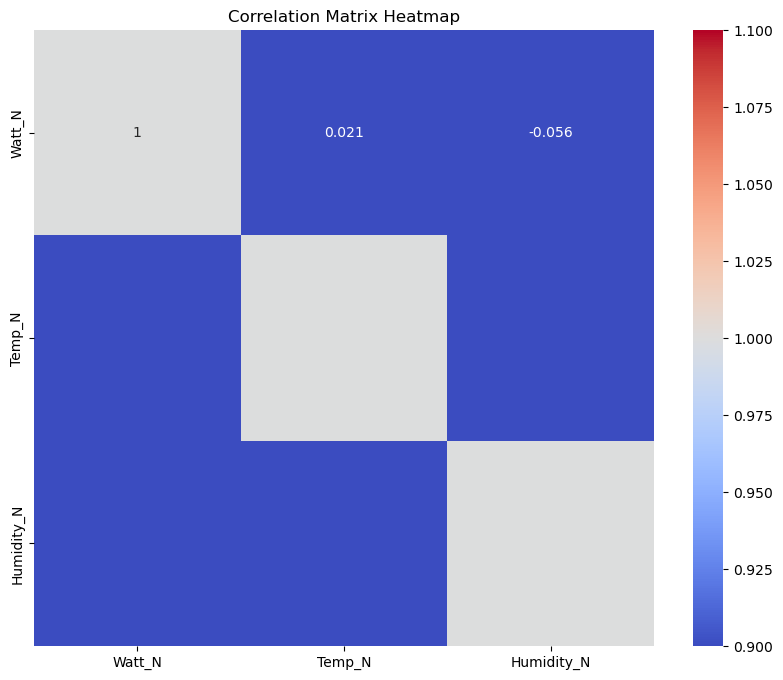

In [111]:
# 상관계수 계산
correlation_matrix = df_nor[["Watt_N", "Temp_N", "Humidity_N"]].corr(method = "pearson")
print("\n상관 행렬:\n", correlation_matrix)

# 히트맵 시각화
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", vmin = 1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.show()

### 전처리 데이터 저장

In [112]:
df_nor.to_csv("C:/Users/gun67/전력 프로젝트/normalization_data/2013_normalization_data", index = False, encoding = "utf-8-sig")

### 저장 데이터 확인

In [113]:
pd.read_csv("C:/Users/gun67/전력 프로젝트/normalization_data/2013_normalization_data", encoding = "utf-8-sig")

,Year-Month-Date,Time,Watt_N,Temp_N,Humidity_N
0,2013-01-01,[ 00:00 ],0.064813,0.378378,0.813486
1,2013-01-01,[ 00:01 ],0.069282,0.378378,0.811090
2,2013-01-01,[ 00:02 ],0.066675,0.378378,0.808709
3,2013-01-01,[ 00:03 ],0.065185,0.378378,0.806313
4,2013-01-01,[ 00:04 ],0.066923,0.378378,0.803917
...,...,...,...,...,...
525595,2013-12-31,[ 23:55 ],0.049789,0.324324,0.727403
525596,2013-12-31,[ 23:56 ],0.049665,0.324324,0.727403
525597,2013-12-31,[ 23:57 ],0.049665,0.324324,0.727403
525598,2013-12-31,[ 23:58 ],0.061708,0.324324,0.727403
